In [1]:
import os
import pandas as pd

datasetPath = './CICIDS2017'
allDataframe = []

for file in os.listdir(datasetPath):
    if file.endswith(".csv"):
        csvPath = os.path.join(datasetPath, file)
        dataframe = pd.read_csv(csvPath)
        allDataframe.append(dataframe)

summaryDataset = pd.concat(allDataframe, axis=0)
summaryDataset.dropna(inplace=True)
summaryDataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [2]:
summaryDataset.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2829385 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0    Destination Port             2829385 non-null  int64  
 1    Flow Duration                2829385 non-null  int64  
 2    Total Fwd Packets            2829385 non-null  int64  
 3    Total Backward Packets       2829385 non-null  int64  
 4   Total Length of Fwd Packets   2829385 non-null  int64  
 5    Total Length of Bwd Packets  2829385 non-null  int64  
 6    Fwd Packet Length Max        2829385 non-null  int64  
 7    Fwd Packet Length Min        2829385 non-null  int64  
 8    Fwd Packet Length Mean       2829385 non-null  float64
 9    Fwd Packet Length Std        2829385 non-null  float64
 10  Bwd Packet Length Max         2829385 non-null  int64  
 11   Bwd Packet Length Min        2829385 non-null  int64  
 12   Bwd Packet Length Mean       2829

In [3]:
def standardizeColumnNames(df):
  df.columns = df.columns.str.lower()
  df.columns = df.columns.str.strip()
  df.columns = df.columns.str.replace(' +', ' ', regex=True)
  df.columns = df.columns.str.title()
  return df

summaryDataset = standardizeColumnNames(summaryDataset)

In [4]:
summaryDataset.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2829385 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Destination Port             2829385 non-null  int64  
 1   Flow Duration                2829385 non-null  int64  
 2   Total Fwd Packets            2829385 non-null  int64  
 3   Total Backward Packets       2829385 non-null  int64  
 4   Total Length Of Fwd Packets  2829385 non-null  int64  
 5   Total Length Of Bwd Packets  2829385 non-null  int64  
 6   Fwd Packet Length Max        2829385 non-null  int64  
 7   Fwd Packet Length Min        2829385 non-null  int64  
 8   Fwd Packet Length Mean       2829385 non-null  float64
 9   Fwd Packet Length Std        2829385 non-null  float64
 10  Bwd Packet Length Max        2829385 non-null  int64  
 11  Bwd Packet Length Min        2829385 non-null  int64  
 12  Bwd Packet Length Mean       2829385 non-null  f

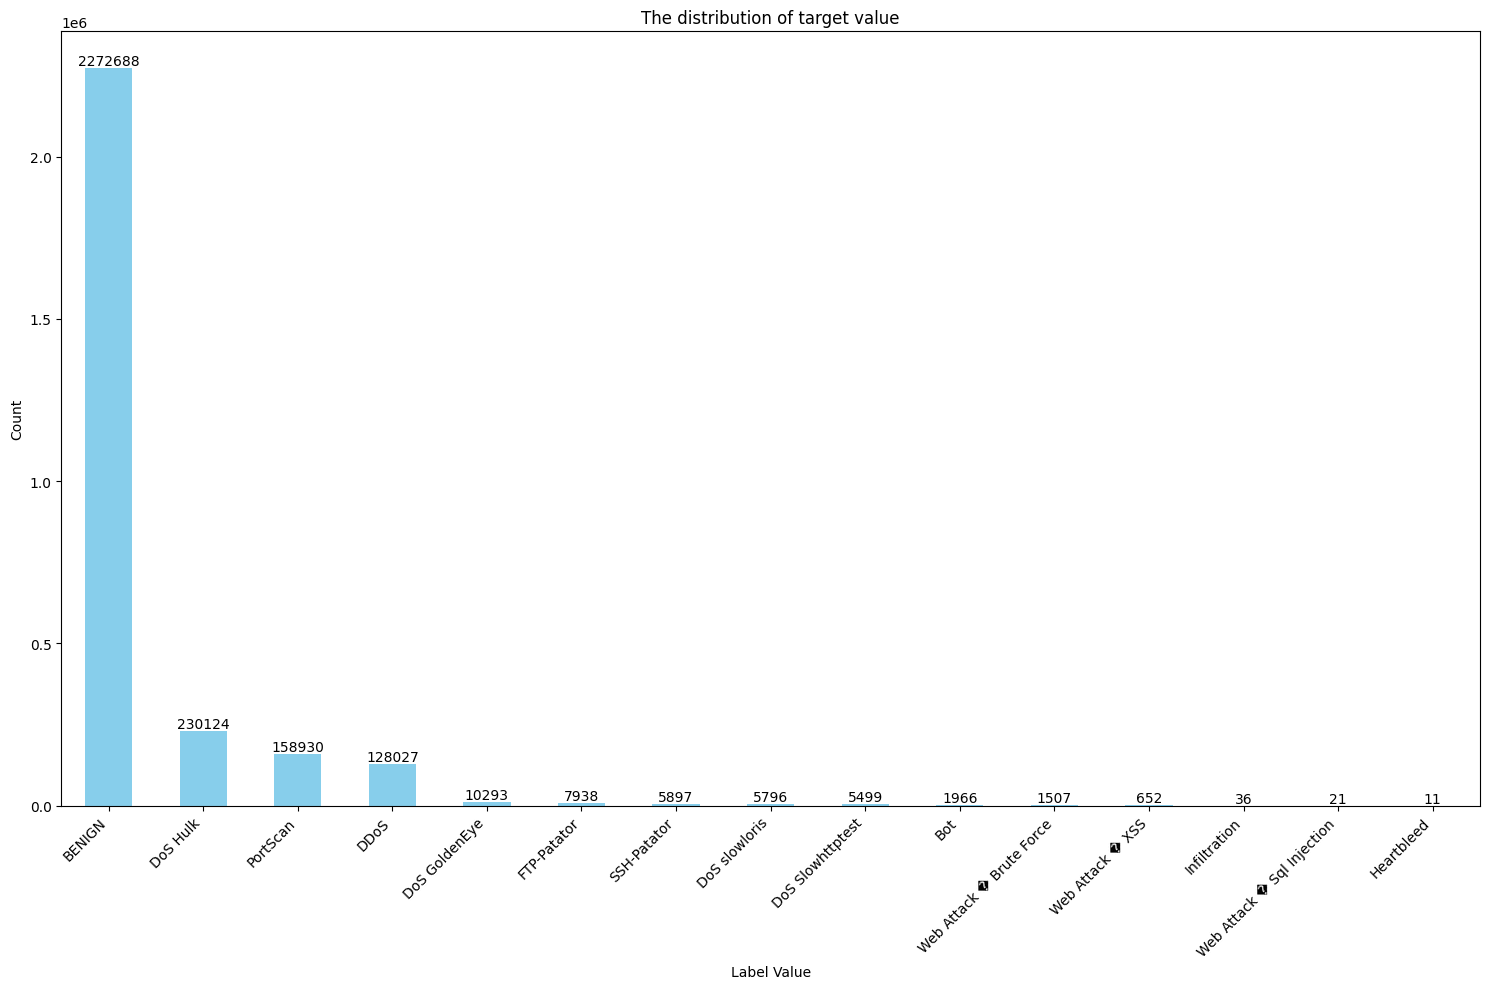

In [5]:
import matplotlib.pyplot as plt

labelCounts = summaryDataset['Label'].value_counts()

plt.figure(figsize=(15, 10))
ax = labelCounts.plot(kind='bar', color='skyblue')

for bar in ax.containers[0]:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y + 0.1, round(y, 2), ha='center', va='bottom')

plt.xlabel('Label Value')
plt.ylabel('Count')
plt.title('The distribution of target value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import NearestNeighbors
import numpy as np

THRESHOLD = int(1e5)
randomState = 194
features, labels = summaryDataset.drop(columns='Label'), summaryDataset['Label']
maxFloat64 = np.finfo(np.float64).max
features = features.where(features <= maxFloat64, maxFloat64)

classQuantity = summaryDataset['Label'].value_counts()
classUndersample = classQuantity[classQuantity >= THRESHOLD].index

In [7]:
underSampler = RandomUnderSampler(sampling_strategy={label: THRESHOLD if (classQuantity[label] > THRESHOLD) else classQuantity[label] for label in np.unique(summaryDataset['Label'])},
                                  random_state=randomState)
sampledFeatures, sampledLabels = underSampler.fit_resample(features, labels)

In [8]:
smoteen = SMOTE(sampling_strategy={label: THRESHOLD for label in np.unique(summaryDataset['Label'])}, 
                k_neighbors=NearestNeighbors(n_neighbors=5, n_jobs=-1), 
                random_state=randomState)
balancedFeatures, balancedLabels = smoteen.fit_resample(sampledFeatures, sampledLabels)

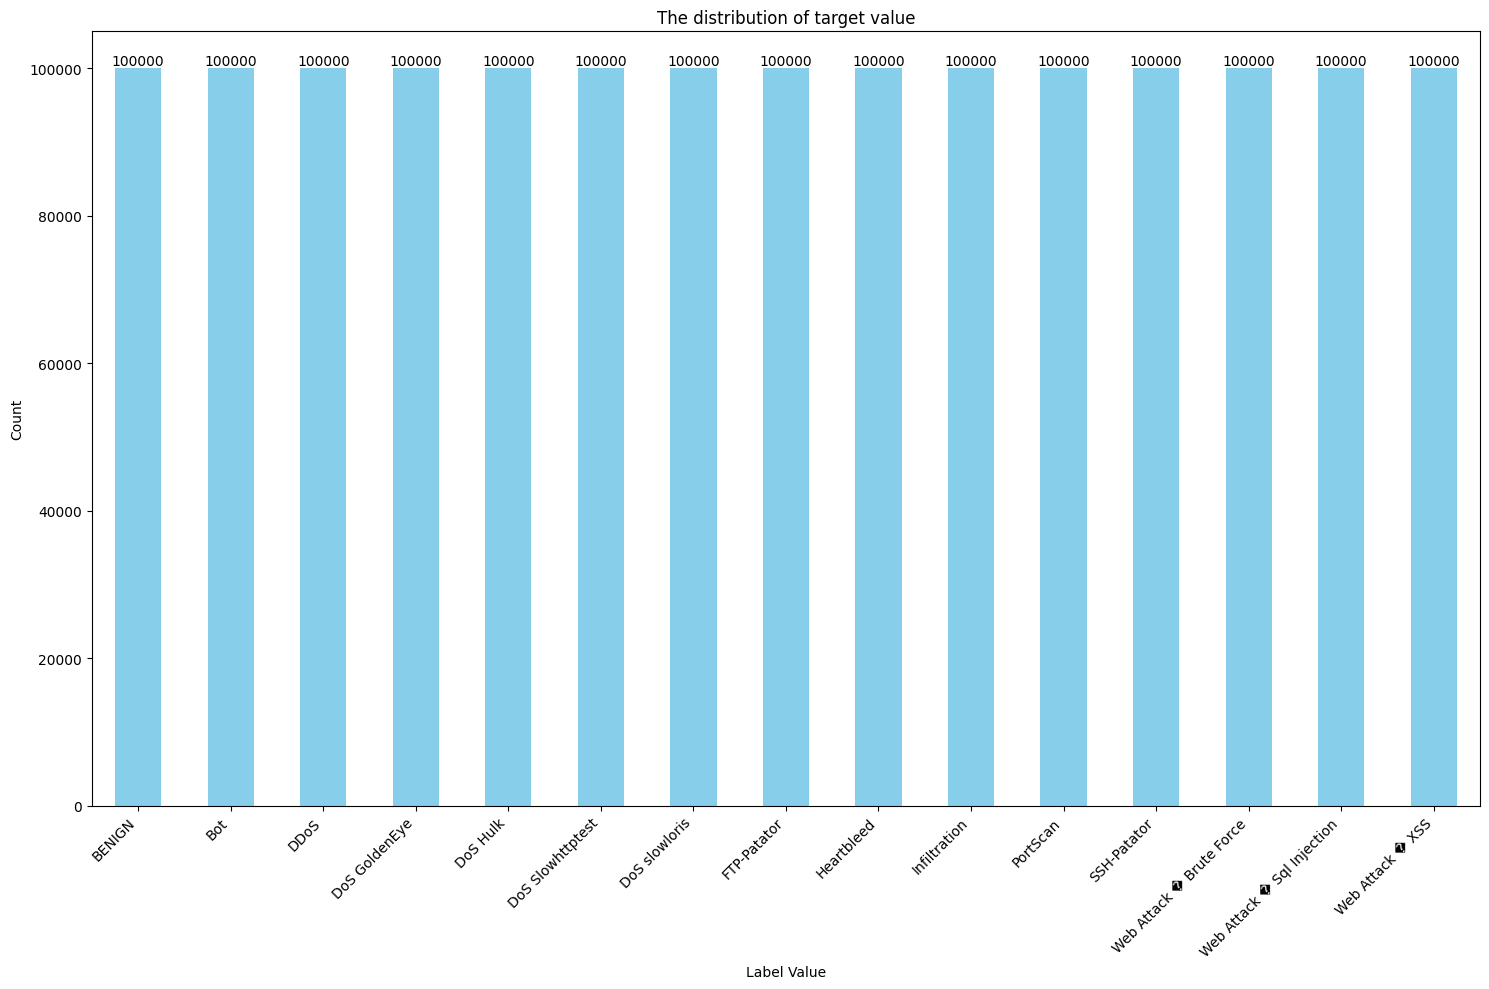

In [9]:
labelCounts = balancedLabels.value_counts()

plt.figure(figsize=(15, 10))
ax = labelCounts.plot(kind='bar', color='skyblue')

for bar in ax.containers[0]:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y + 0.1, round(y, 2), ha='center', va='bottom')

plt.xlabel('Label Value')
plt.ylabel('Count')
plt.title('The distribution of target value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.feature_selection import SelectPercentile, VarianceThreshold, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, QuantileTransformer

labelEncoder = LabelEncoder().fit(balancedLabels)
labelMapping = {value: label for value, label in enumerate(labelEncoder.classes_)}
balancedLabels = labelEncoder.transform(balancedLabels)

balancedFeatures = Pipeline([
    ('Quantiles transform ', QuantileTransformer(n_quantiles=THRESHOLD//4, subsample=THRESHOLD//2, output_distribution='normal')),
    ('Remove constant-value feature', VarianceThreshold()),
    ('Remove quasi-constant value feature', VarianceThreshold(0.99 * (1.0 - 0.99))),
    ('Select K-Best feature', SelectPercentile(mutual_info_classif, percentile=50))]
).fit_transform(balancedFeatures, balancedLabels)

In [11]:
import json

np.save('./preprocessedData/data.npy', balancedFeatures)
np.save('./preprocessedData/label.npy', balancedLabels)

with open("./preprocessedData/labelMapping.json", "w") as file:
    json.dump(labelMapping, file)